## Dual-Feature Trust Evaluation: Probabilistic vs. Deterministic Models (Bandwidth and Latency)

In [1]:
from app.trust_evaluation.probabilistic import SingleFeatureTrustModel
import matplotlib.pyplot as mlp
import numpy as np
import random
import seaborn as sns
sns.set_theme()

# Re-defining prob_transform for self-contained example
def prob_transform(min_val, max_val, value, is_reverse=False):
    """
    Transforms a value from a given range to a probability (0 to 1).
    If is_reverse is True, higher values result in lower probabilities.
    """
    if value < min_val:
        transformed_value = 0.0
    elif value > max_val:
        transformed_value = 1.0
    else:
        transformed_value = (value - min_val) / (max_val - min_val)

    if is_reverse:
        return 1.0 - transformed_value
    else:
        return transformed_value

ranges = {
    'bandwidth': [10, 100],  # Min and Max bandwidth (e.g., Mbps), higher is better
    'latency': [10, 200]    # Min and Max latency (e.g., ms), lower is better
}

weights = {
    'bandwidth': 0.5,
    'latency': 0.5
}



### Example 1: Consistent Good Performance for Both Features
This scenario simulates a node exhibiting consistently good behavior across both bandwidth and latency. Bandwidth values remain high, while latency values stay low, indicating reliable performance. This example aims to show how both algorithms converge to high trust scores under stable, positive conditions.

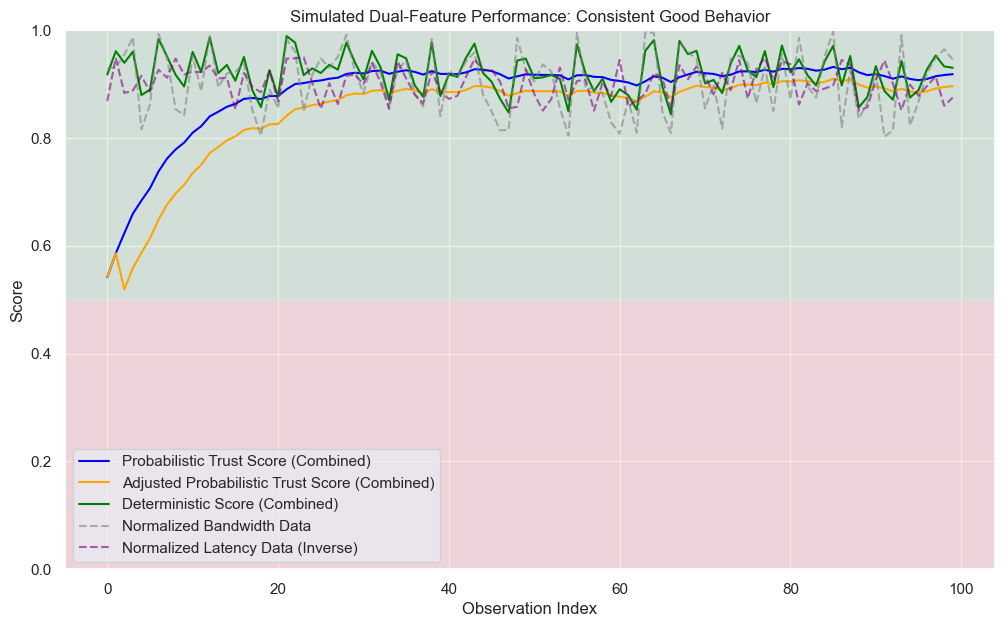

In [2]:
sftm_bandwidth = SingleFeatureTrustModel(name='bandwidth')
sftm_latency = SingleFeatureTrustModel(name='latency')

num_observations = 100
bandwidth_data = [random.uniform(80, 100) for _ in range(num_observations)]
latency_data = [random.uniform(10, 30) for _ in range(num_observations)]

combined_trust_score = []
combined_adjusted_trust_score = []
combined_deterministic_score = []

for i in range(num_observations):
    # Process bandwidth
    bw_value = bandwidth_data[i]
    norm_bw = prob_transform(ranges['bandwidth'][0], ranges['bandwidth'][1], bw_value, is_reverse=False)
    sftm_bandwidth.observe(norm_bw)

    # Process latency (lower is better, so is_reverse=True)
    lat_value = latency_data[i]
    norm_lat = prob_transform(ranges['latency'][0], ranges['latency'][1], lat_value, is_reverse=True)
    sftm_latency.observe(norm_lat)

    # Calculate combined scores
    prob_combined_score = (sftm_bandwidth.trust_score * weights['bandwidth']) + \
                            (sftm_latency.trust_score * weights['latency'])
    prob_adjusted_combined_score = (sftm_bandwidth.adjusted_trust_score * weights['bandwidth']) + \
                                   (sftm_latency.adjusted_trust_score * weights['latency'])
    
    det_combined_score = (norm_bw * weights['bandwidth']) + (norm_lat * weights['latency'])

    combined_trust_score.append(prob_combined_score)
    combined_adjusted_trust_score.append(prob_adjusted_combined_score)
    combined_deterministic_score.append(det_combined_score)

# Plotting
mlp.figure(figsize=(12, 7))
mlp.axhspan(0.5, 1, facecolor='green', alpha=0.1) 
mlp.axhspan(0, 0.5, facecolor='red', alpha=0.1) 
mlp.plot(combined_trust_score, label='Probabilistic Trust Score (Combined)', color='blue')
mlp.plot(combined_adjusted_trust_score, label='Adjusted Probabilistic Trust Score (Combined)', color='orange')
mlp.plot(combined_deterministic_score, label='Deterministic Score (Combined)', color='green')
mlp.plot(np.array(bandwidth_data) / ranges['bandwidth'][1], label='Normalized Bandwidth Data', color='gray', linestyle='dashed', alpha=0.6)
mlp.plot(1 - (np.array(latency_data) / ranges['latency'][1]), label='Normalized Latency Data (Inverse)', color='purple', linestyle='dashed', alpha=0.6)
mlp.legend()
mlp.title('Simulated Dual-Feature Performance: Consistent Good Behavior')
mlp.xlabel('Observation Index')
mlp.ylabel('Score')
mlp.ylim(0, 1) # Ensure y-axis is between 0 and 1
mlp.grid(True)
mlp.show()


### Example 2: Mixed Performance (Bandwidth Good, Latency Bad)
This example illustrates a scenario where a node performs well in terms of bandwidth (high values) but poorly in terms of latency (consistently high values). This case highlights how the combined trust score reflects a compromise between the two features, and how the probabilistic model adapts to conflicting evidence, potentially showing higher uncertainty for the overall score.

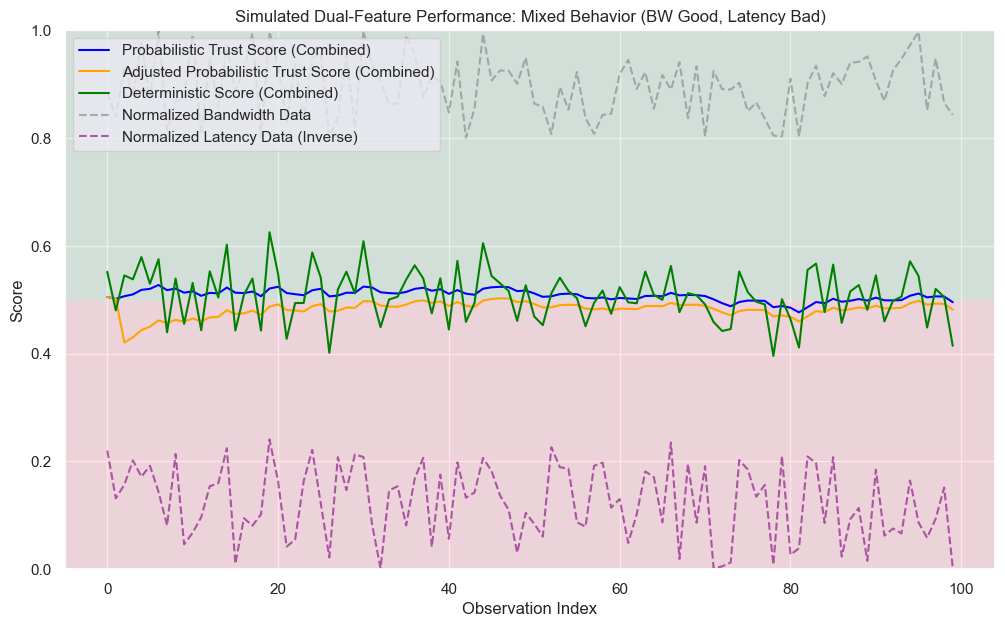

In [3]:
sftm_bandwidth = SingleFeatureTrustModel(name='bandwidth')
sftm_latency = SingleFeatureTrustModel(name='latency')

num_observations = 100
bandwidth_data = [random.uniform(80, 100) for _ in range(num_observations)] # Consistently good bandwidth
latency_data = [random.uniform(150, 200) for _ in range(num_observations)] # Consistently bad latency

combined_trust_score = []
combined_adjusted_trust_score = []
combined_deterministic_score = []

for i in range(num_observations):
    # Process bandwidth
    bw_value = bandwidth_data[i]
    norm_bw = prob_transform(ranges['bandwidth'][0], ranges['bandwidth'][1], bw_value, is_reverse=False)
    sftm_bandwidth.observe(norm_bw)

    # Process latency (lower is better, so is_reverse=True)
    lat_value = latency_data[i]
    norm_lat = prob_transform(ranges['latency'][0], ranges['latency'][1], lat_value, is_reverse=True)
    sftm_latency.observe(norm_lat)

    # Calculate combined scores
    prob_combined_score = (sftm_bandwidth.trust_score * weights['bandwidth']) + \
                            (sftm_latency.trust_score * weights['latency'])
    prob_adjusted_combined_score = (sftm_bandwidth.adjusted_trust_score * weights['bandwidth']) + \
                                   (sftm_latency.adjusted_trust_score * weights['latency'])
    
    det_combined_score = (norm_bw * weights['bandwidth']) + (norm_lat * weights['latency'])

    combined_trust_score.append(prob_combined_score)
    combined_adjusted_trust_score.append(prob_adjusted_combined_score)
    combined_deterministic_score.append(det_combined_score)

# Plotting
mlp.figure(figsize=(12, 7))
mlp.axhspan(0.5, 1, facecolor='green', alpha=0.1) 
mlp.axhspan(0, 0.5, facecolor='red', alpha=0.1) 
mlp.plot(combined_trust_score, label='Probabilistic Trust Score (Combined)', color='blue')
mlp.plot(combined_adjusted_trust_score, label='Adjusted Probabilistic Trust Score (Combined)', color='orange')
mlp.plot(combined_deterministic_score, label='Deterministic Score (Combined)', color='green')
mlp.plot(np.array(bandwidth_data) / ranges['bandwidth'][1], label='Normalized Bandwidth Data', color='gray', linestyle='dashed', alpha=0.6)
mlp.plot(1 - (np.array(latency_data) / ranges['latency'][1]), label='Normalized Latency Data (Inverse)', color='purple', linestyle='dashed', alpha=0.6)
mlp.legend()
mlp.title('Simulated Dual-Feature Performance: Mixed Behavior (BW Good, Latency Bad)')
mlp.xlabel('Observation Index')
mlp.ylabel('Score')
mlp.ylim(0, 1) # Ensure y-axis is between 0 and 1
mlp.grid(True)
mlp.show()


### Example 3: Volatile Performance for Both Features
This scenario models a node with highly fluctuating performance for both bandwidth and latency. Both metrics vary widely, introducing significant uncertainty. This example demonstrates the probabilistic algorithm's ability to adapt to instability, with its adjusted score potentially reflecting higher uncertainty, while the deterministic model may show erratic swings.

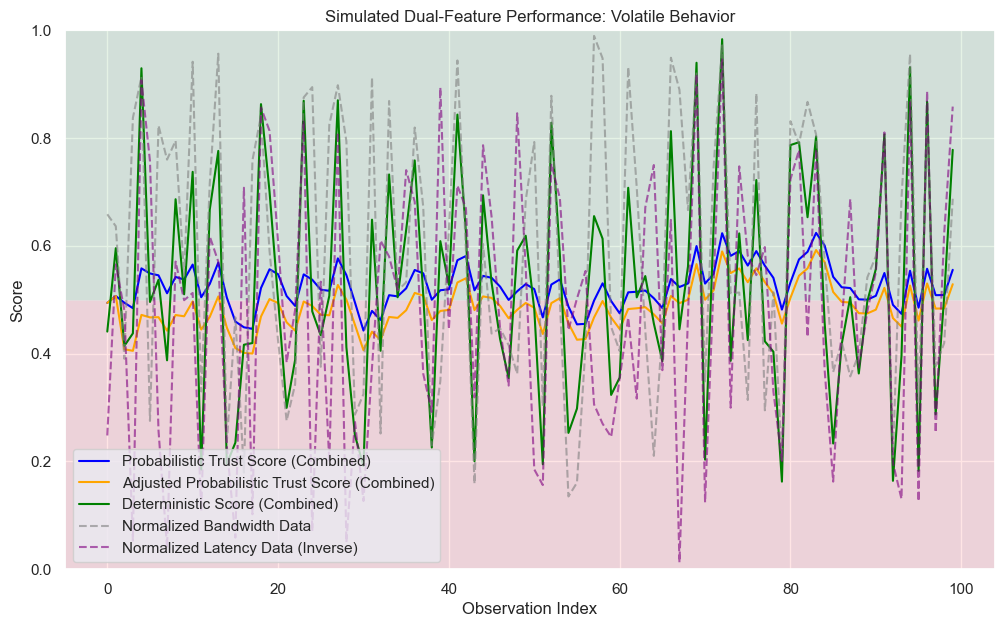

In [4]:
sftm_bandwidth = SingleFeatureTrustModel(name='bandwidth')
sftm_latency = SingleFeatureTrustModel(name='latency')

num_observations = 100
bandwidth_data = [random.uniform(10, 100) for _ in range(num_observations)] # Volatile bandwidth
latency_data = [random.uniform(10, 200) for _ in range(num_observations)]   # Volatile latency

combined_trust_score = []
combined_adjusted_trust_score = []
combined_deterministic_score = []

for i in range(num_observations):
    # Process bandwidth
    bw_value = bandwidth_data[i]
    norm_bw = prob_transform(ranges['bandwidth'][0], ranges['bandwidth'][1], bw_value, is_reverse=False)
    sftm_bandwidth.observe(norm_bw)

    # Process latency (lower is better, so is_reverse=True)
    lat_value = latency_data[i]
    norm_lat = prob_transform(ranges['latency'][0], ranges['latency'][1], lat_value, is_reverse=True)
    sftm_latency.observe(norm_lat)

    # Calculate combined scores
    prob_combined_score = (sftm_bandwidth.trust_score * weights['bandwidth']) + \
                            (sftm_latency.trust_score * weights['latency'])
    prob_adjusted_combined_score = (sftm_bandwidth.adjusted_trust_score * weights['bandwidth']) + \
                                   (sftm_latency.adjusted_trust_score * weights['latency'])
    
    det_combined_score = (norm_bw * weights['bandwidth']) + (norm_lat * weights['latency'])

    combined_trust_score.append(prob_combined_score)
    combined_adjusted_trust_score.append(prob_adjusted_combined_score)
    combined_deterministic_score.append(det_combined_score)

mlp.figure(figsize=(12, 7))
mlp.axhspan(0.5, 1, facecolor='green', alpha=0.1) 
mlp.axhspan(0, 0.5, facecolor='red', alpha=0.1) 
mlp.plot(combined_trust_score, label='Probabilistic Trust Score (Combined)', color='blue')
mlp.plot(combined_adjusted_trust_score, label='Adjusted Probabilistic Trust Score (Combined)', color='orange')
mlp.plot(combined_deterministic_score, label='Deterministic Score (Combined)', color='green')
mlp.plot(np.array(bandwidth_data) / ranges['bandwidth'][1], label='Normalized Bandwidth Data', color='gray', linestyle='dashed', alpha=0.6)
mlp.plot(1 - (np.array(latency_data) / ranges['latency'][1]), label='Normalized Latency Data (Inverse)', color='purple', linestyle='dashed', alpha=0.6)
mlp.legend()
mlp.title('Simulated Dual-Feature Performance: Volatile Behavior')
mlp.xlabel('Observation Index')
mlp.ylabel('Score')
mlp.ylim(0, 1) # Ensure y-axis is between 0 and 1
mlp.grid(True)
mlp.show()
